<a href="https://colab.research.google.com/github/ghazaelpo/DevOps-exercises/blob/main/Lecture_6_DIP_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6 DIP 2019-3

> Image Convolution in frequency domain
---


In [ ]:
#!/usr/bin/env python
## -*- coding: utf-8 -*-
__author__ = ["E. Ulises Moya Sánchez"]
__copyright__ = "Copyright 2019, Gobierno de Jalisco"
__credits__ = ["E. Ulises Moya Sánchez"]
__license__ = "MIT"
__version__ = "0.0.1"
__maintainer__ = ["E. Ulises Moya Sánchez"]
__email__ = "eduardo.moya@jalisco.gob.mx"
__status__ = "Development"

import cv2
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import urllib
plt.rcParams['figure.figsize']=(12,8)

#%matplotlib inline

## 1D Convolution

0.025 40
[0.         0.02564103 0.05128205 0.07692308 0.1025641  0.12820513
 0.15384615 0.17948718 0.20512821 0.23076923 0.25641026 0.28205128
 0.30769231 0.33333333 0.35897436 0.38461538 0.41025641 0.43589744
 0.46153846 0.48717949 0.51282051 0.53846154 0.56410256 0.58974359
 0.61538462 0.64102564 0.66666667 0.69230769 0.71794872 0.74358974
 0.76923077 0.79487179 0.82051282 0.84615385 0.87179487 0.8974359
 0.92307692 0.94871795 0.97435897 1.        ] (40,)
(-1.7763568394002505e-15-0j)


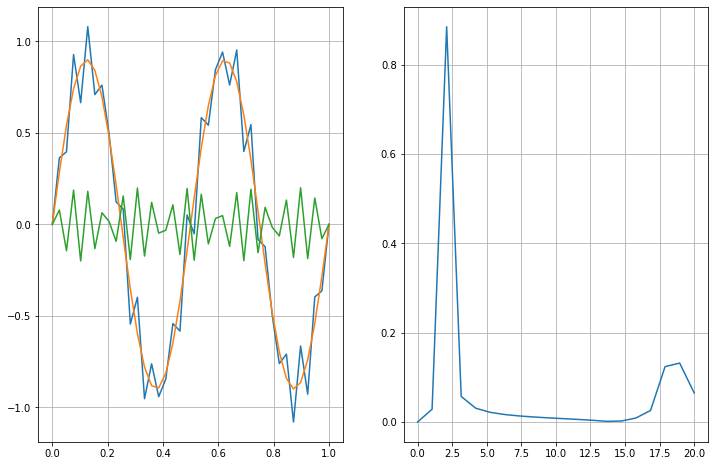

In [ ]:
#from scipy.fftpack import fft
# Number of sample points
N = 40
# sample spacing
T = 1.0 / N
print(T, N)
w1=2.0 # frequencia uno
A1=0.9   # Amplitud uno
w2=17.0  # frecuencia dos 
A2=0.2 # Amplitud dos
x = np.linspace(0.0, N*T, N)
print(x, x.shape)
y = A1*np.sin(w1 * 2.0*np.pi*x) + A2*np.sin(w2 * 2.0*np.pi*x)
yf = fft(y)
print(yf[0])
yf = 2.0/N * np.abs(yf[0:N//2])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig = plt.figure()
fig.subplots_adjust(hspace=0.0, wspace=0.2)
ax = fig.add_subplot(1,2,1)
ax.plot(x,y)
ax.plot(x,A1*np.sin(w1 * 2.0*np.pi*x))
ax.plot(x,A2*np.sin(w2 * 2.0*np.pi*x))
plt.grid()
ax = fig.add_subplot(1,2,2)
ax.plot(xf,(yf))
plt.grid()
plt.show()

---
## 2D Convolution
### Download Images


In [ ]:
!wget http://cosmin.users.sourceforge.net/testing/lena_16g_lin.png
!wget https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/8-Linear-Image-Processing/Lowpass_Filter/croppedBike.png
!ls

--2022-07-07 23:42:52--  http://cosmin.users.sourceforge.net/testing/lena_16g_lin.png
Resolving cosmin.users.sourceforge.net (cosmin.users.sourceforge.net)... 204.68.111.100
Connecting to cosmin.users.sourceforge.net (cosmin.users.sourceforge.net)|204.68.111.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76156 (74K) [image/png]
Saving to: ‘lena_16g_lin.png.1’

lena_16g_lin.png.1  100%[===================>]  74.37K  --.-KB/s    in 0.07s   

2022-07-07 23:42:53 (1.10 MB/s) - ‘lena_16g_lin.png.1’ saved [76156/76156]

--2022-07-07 23:42:53--  https://web.stanford.edu/class/ee368/Handouts/Lectures/Examples/8-Linear-Image-Processing/Lowpass_Filter/croppedBike.png
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38356 (37K) [image/png]
Saving to: ‘croppedBike.png.1’

croppedBike.png.

(256, 256)
uint8
255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


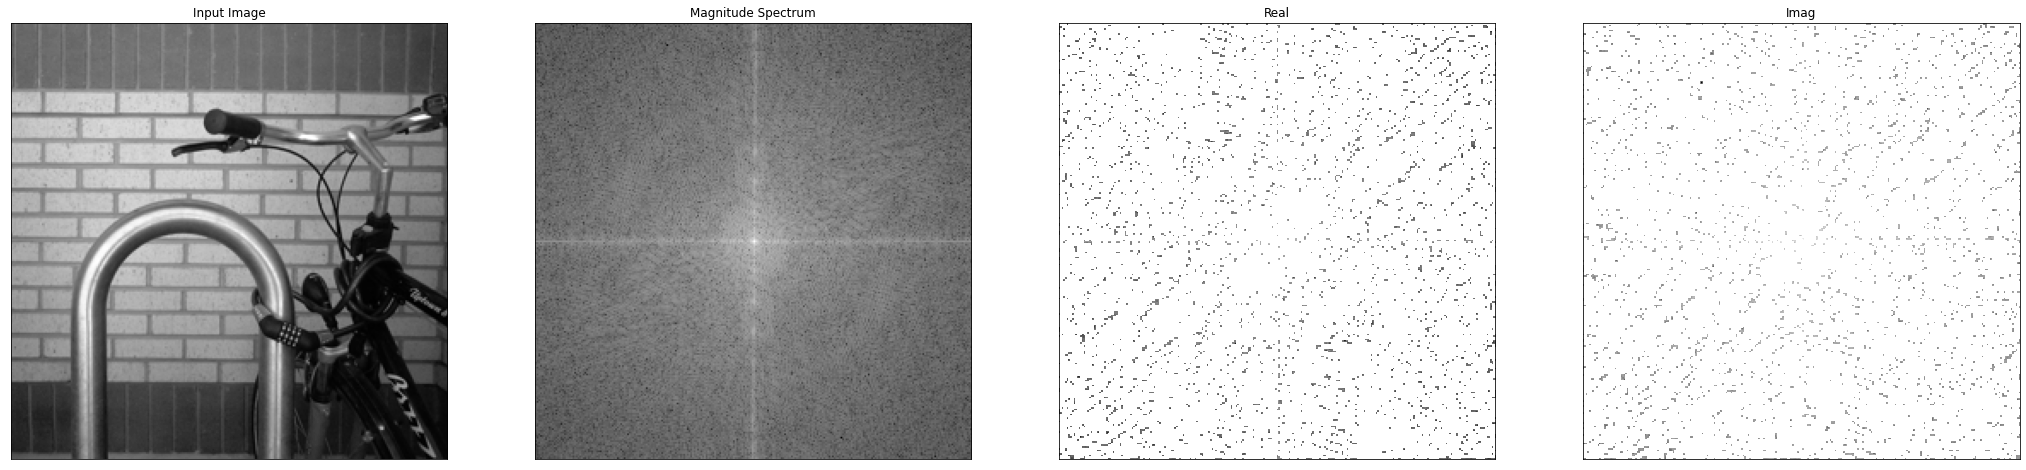

In [ ]:



path_img_1='/content/croppedBike.png'

path_img_2='lena_16g_lin.png'
#img = np.load('69_0.npy')[...,:3]
#img = np.mean(img,axis=2)
#print(img3.shape)
#img4 = np.expand_dims(img3,axis=0)
#print(img3m.shape)
img = cv2.imread(path_img_1,cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path_img_2,cv2.IMREAD_GRAYSCALE)

#print(arr.shape)
print(img.shape)
print(img.dtype)
print(np.max(img))


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
real_fft= 20*np.log(np.real(fshift))
imag_fft= 20*np.log(np.imag(fshift))

fig = plt.figure(figsize=(36, 24))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
#plt.subplot(142),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(real_fft, cmap = 'gray')
plt.title('Real'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(imag_fft, cmap = 'gray')
plt.title('Imag'), plt.xticks([]), plt.yticks([])
plt.show()



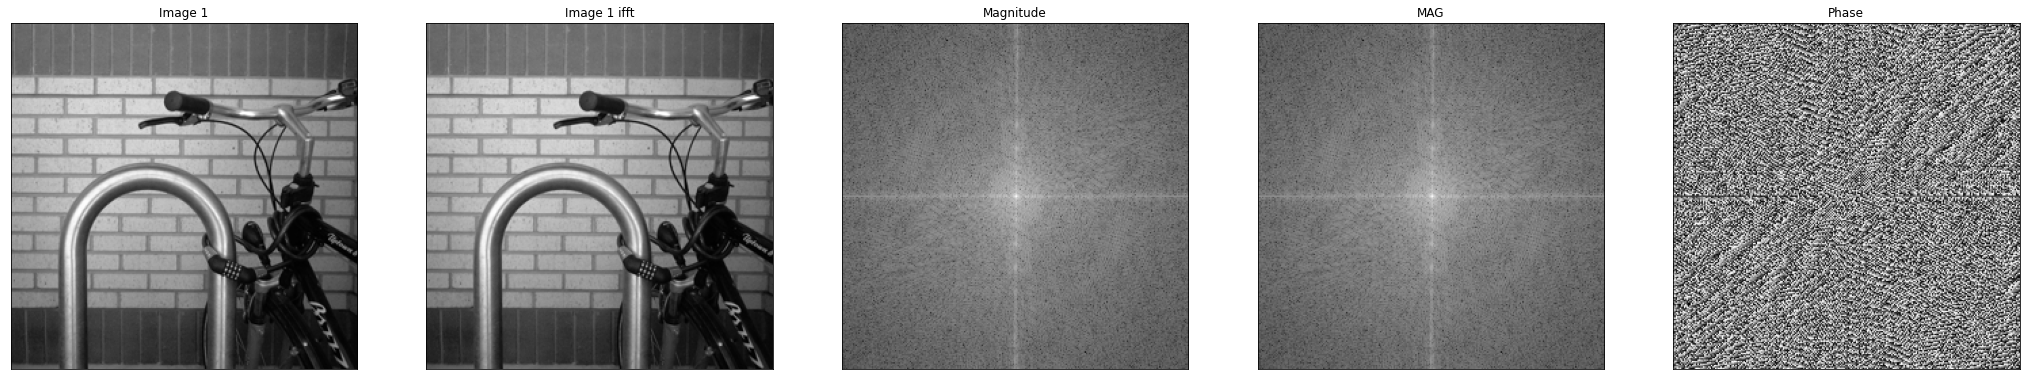

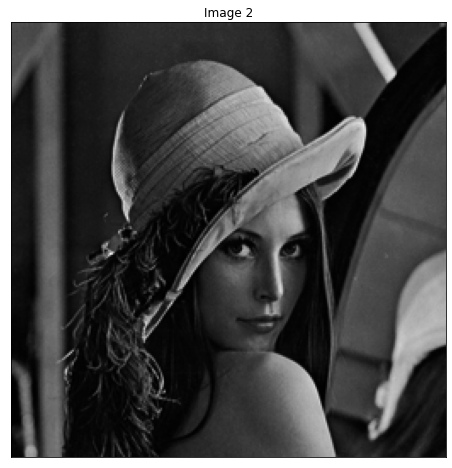

In [ ]:
#fft usando openCV
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
#magnitudw
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
mag, phase=cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
#transformada inversa
img_back = cv2.idft(dft)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


dft2 = cv2.dft(np.float32(img2),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

mag2, phase2=cv2.cartToPolar(dft_shift2[:,:,0],dft_shift2[:,:,1])

m2ph1 = mag2*np.exp(-1j*phase)

m1ph2 = mag*np.exp(-1j*phase2)

#sacar la ifft m2ph1 y de m1ph2
#visualizar
fig = plt.figure(figsize=(36, 24))
plt.subplot(151),plt.imshow(img, cmap = 'gray')
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(img_back, cmap = 'gray')
plt.title('Image 1 ifft'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(20*np.log(mag), cmap = 'gray')
plt.title('MAG'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(phase, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()


plt.imshow(img2, cmap = 'gray')
plt.title('Image 2'), plt.xticks([]), plt.yticks([])
plt.show()

## Combinar la amplitud y la phase de la imagen 1 con la imagen  2

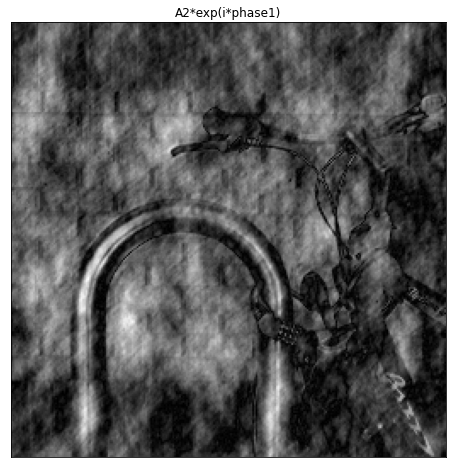

In [ ]:
m2ph1 = mag2*np.exp(-1j*phase)

m1ph2 = mag*np.exp(-1j*phase2)

m1ph1 = mag*np.exp(-1j*phase)
m2ph2 = mag2*np.exp(-1j*phase2)

im2ph1 = np.fft.ifft2(m2ph1)
im2ph1= np.abs(im2ph1)
plt.imshow(im2ph1, cmap='gray')
plt.title('A2*exp(i*phase1)'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
%timeit fft1 = np.fft.fft2(img)

1000 loops, best of 5: 1.37 ms per loop


In [ ]:
%timeit fft2 = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

1000 loops, best of 5: 713 µs per loop


In [ ]:
rows,cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(rows,nrows,cols,ncols)

256 256 256 256


In [ ]:
def gauss(L1=64, L2=64, sh=2, sv=2):
    X = np.arange(-L1 / 2, L1 / 2, 1)
    Y = np.arange(-L2 / 2, L2 / 2, 1)
    x, y = np.meshgrid(X, Y)
    g = np.exp((-(x ** 2)) / (2 * sh ** 2)) * np.exp((-(y ** 2)) / (2 * sv ** 2))
    return g

(30, 30)


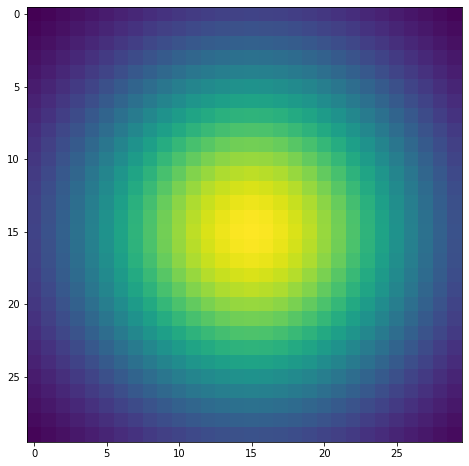

In [ ]:
L1= 30
sh = 9
sv = 9
X = np.arange(-L1 / 2, L1 / 2, 1)
x, y = np.meshgrid(X, X)
print(x.shape)
g = np.exp((-(x ** 2)) / (2 * sh ** 2)) * np.exp((-(y ** 2)) / (2 * sv ** 2))
plt.imshow(g)
plt.show()

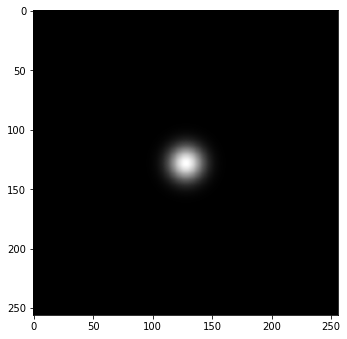

1.0


In [ ]:
g=gauss(L1=cols, L2=rows, sh=10, sv=10)
fig = plt.figure()
fig.subplots_adjust(hspace=0.0, wspace=0.2)
ax = fig.add_subplot(1,2,1)
ax.imshow(g, cmap='gray')
plt.show()
print(np.max(g))

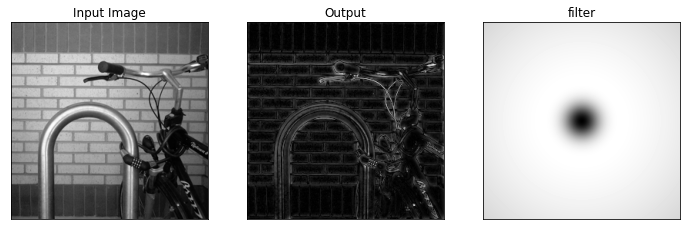

In [ ]:

g1=gauss(L1=cols, L2=rows, sh=15, sv=15)
g2=gauss(L1=cols, L2=rows, sh=290, sv=290)
g=g2-g1

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) # fft2d(img)
dft_shift = np.fft.fftshift(dft) #mandando al centro 
m0 = np.dstack((g, g)) #filtro apilado (para formar un  complejo)
fshift0 = dft_shift * m0 #convolución (multiplicación numeros comples )
f_ishift0 = np.fft.ifftshift(fshift0)
img_back0 = cv2.idft(f_ishift0)
img_back0 = cv2.magnitude(img_back0[:, :, 0], img_back0[:, :, 1])

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back0, cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(g, cmap = 'gray')
plt.title('filter'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def qgabor(L1, L2, phi=0, ch=2, cv=2, sh=2, sv=2):
    X = np.arange(-L1 / 2, L1 / 2, 1)
    Y = np.arange(-L2 / 2, L2 / 2, 1)
    X, Y = np.meshgrid(X, Y)
    x = X * np.cos(phi) + Y * np.sin(phi)
    y = -X * np.sin(phi) + Y * np.cos(phi)
    g = np.exp((-(x ** 2)) / (2 * sh ** 2)) * np.exp((-(y ** 2)) / (2 * sv ** 2))
    r = g * np.cos(ch * x / sh) * np.cos(cv * y / sv)
    i = g * np.sin(ch * x / sh) * np.cos(cv * y / sv)
    j = g * np.cos(ch * x / sh) * np.sin(cv * y / sv)
    k = g * np.sin(ch * x / sh) * np.sin(cv * y / sv)
    return r, i, j, k


def qfilter(img, L1, L2, phi=0, ch=2, cv=2, sh=2, sv=2):
    if img.ndim == 3:
        img = img.mean(2)
    b = 1
    img = cv2.add(img, b)  # some bias to avoid zero in the artag

    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    r, i, j, k = qgabor(L1, L2, phi, ch, cv, sh, sv)
    m0 = np.dstack((r, r))
    m1 = np.dstack((i, i))
    m2 = np.dstack((j, j))
    m3 = np.dstack((k, k))
    fshift0 = dft_shift * m0
    fshift1 = dft_shift * m1
    fshift2 = dft_shift * m2
    fshift3 = dft_shift * m3

    f_ishift0 = np.fft.ifftshift(fshift0)
    img_back0 = cv2.idft(f_ishift0)
    img_back0 = cv2.magnitude(img_back0[:, :, 0], img_back0[:, :, 1])

    f_ishift1 = np.fft.ifftshift(fshift1)
    img_back1 = cv2.idft(f_ishift1)
    img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

    f_ishift2 = np.fft.ifftshift(fshift2)
    img_back2 = cv2.idft(f_ishift2)
    img_back2 = cv2.magnitude(img_back2[:, :, 0], img_back2[:, :, 1])

    f_ishift3 = np.fft.ifftshift(fshift3)
    img_back3 = cv2.idft(f_ishift3)
    img_back3 = cv2.magnitude(img_back3[:, :, 0], img_back3[:, :, 1])

    return img_back0, img_back1, img_back2, img_back3

In [ ]:
I0, I1, I2, I3 = qfilter(img, L1=256, L2=256, phi= 45,  ch=1, cv=1, sh=15, sv=15)

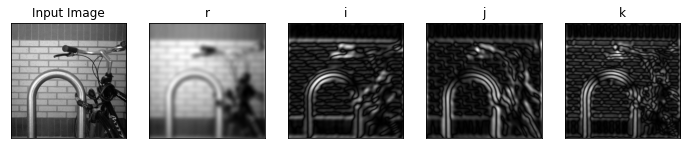

In [ ]:
plt.subplot(151),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(I0, cmap = 'gray')
plt.title('r'), plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(I1, cmap = 'gray')
plt.title('i'), plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(I2, cmap = 'gray')
plt.title('j'), plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(I3, cmap = 'gray')
plt.title('k'), plt.xticks([]), plt.yticks([])
plt.show()